№1

In [222]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


df_2015 = pd.read_excel('Индекс счастья - данные 2015-2022 для ИДЗ.xlsx', sheet_name='2015')


df_2021 = pd.read_excel('Индекс счастья - данные 2015-2022 для ИДЗ.xlsx', sheet_name='2021')
df_2021 = df_2021[df_2021['Regional indicator']=='Middle East and North Africa']
df_2021 = df_2021[['Индекс счастья', 'Индекс социальной поддержки','Здоровье','Отношение к коррупции']]
df_2021.reset_index(drop=True, inplace=True)
df_2021


,Индекс счастья,Индекс социальной поддержки,Здоровье,Отношение к коррупции
0,7.157,0.939,73.503,0.753
1,6.647,0.862,69.495,0.722
2,6.561,0.844,67.333,0.589
3,6.494,0.891,66.603,0.684
4,6.106,0.843,66.900,0.736
5,5.410,0.827,62.300,0.667
6,4.948,0.822,67.199,0.776
7,4.918,0.560,66.208,0.801
8,4.887,0.802,66.005,0.752
9,4.854,0.746,60.583,0.875


In [223]:


scaler = MinMaxScaler(feature_range=(0, 10))
df_2021[['Индекс счастья', 'Индекс социальной поддержки','Здоровье','Отношение к коррупции']] = scaler.fit_transform(df_2021[['Индекс счастья', 'Индекс социальной поддержки','Здоровье','Отношение к коррупции']])
df_2021 = df_2021.round(3)
df_2021.reset_index(drop=True, inplace=True)
df_2021

,Индекс счастья,Индекс социальной поддержки,Здоровье,Отношение к коррупции
0,10.000,10.000,10.000,5.307
1,8.542,7.968,7.553,4.304
2,8.297,7.493,6.233,0.000
3,8.105,8.734,5.788,3.074
4,6.996,7.467,5.969,4.757
5,5.007,7.045,3.161,2.524
6,3.687,6.913,6.152,6.052
7,3.601,0.000,5.547,6.861
8,3.512,6.385,5.423,5.275
9,3.418,4.908,2.113,9.256


Простая гистограмма (10 интеравалов)

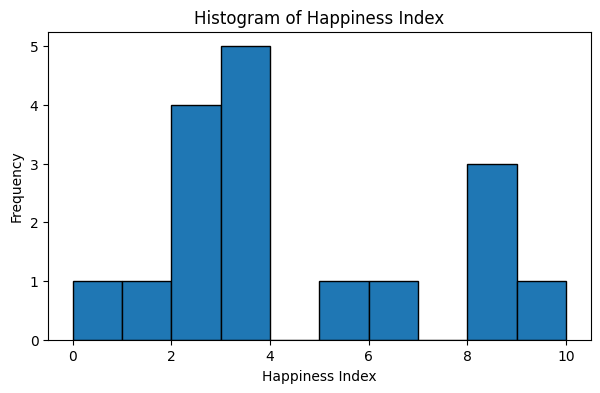

In [224]:


plt.figure(figsize=(7,4))
plt.hist(df_2021['Индекс счастья'], edgecolor='black')
plt.title('Histogram of Happiness Index')
plt.xlabel('Happiness Index')
plt.ylabel('Frequency')
plt.show()


определения оптимального количества интервалов с помощью правила Стёрджесса

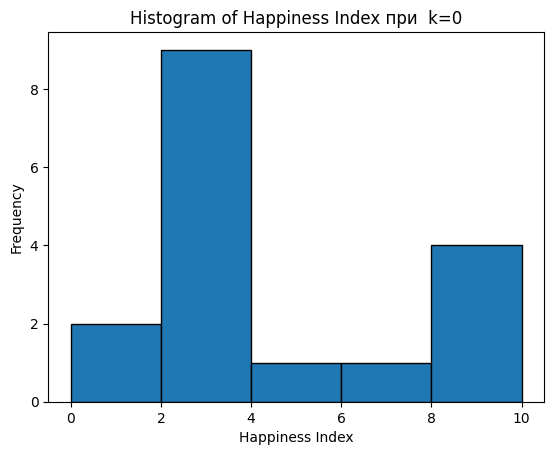

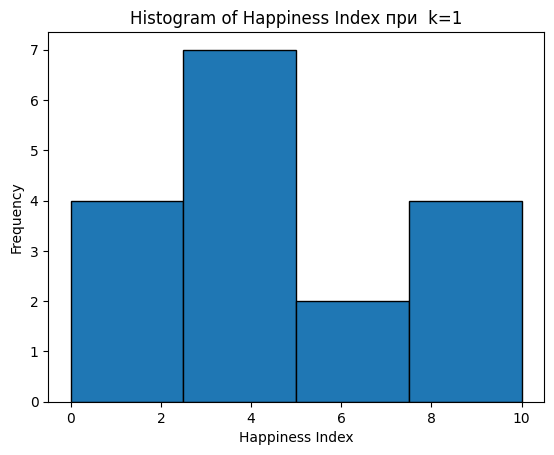

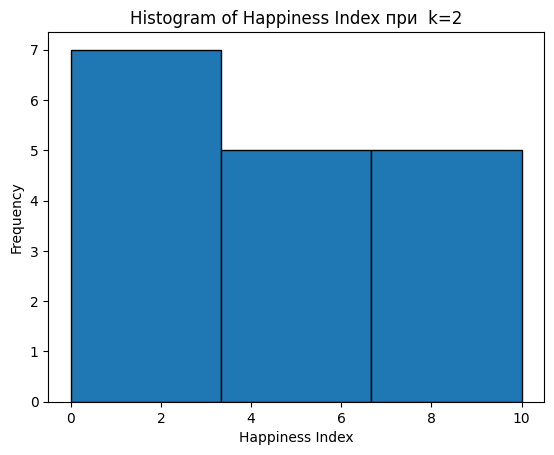

In [231]:
# Размер выборки
n = len(df_2021['Индекс счастья'])

# Вычисление количества интервалов по формуле Стёрджесса
k = int(1 + np.log2(n))

maxHappines = df_2021['Индекс счастья'].max() + 0.0005
minHappines = df_2021['Индекс счастья'].min() - 0.0005

# Размах выборки
rangeOfHappinessIndex= (maxHappines - minHappines)

for i in range(0, 3):

    # Вычисление ширины интервала
    width = (rangeOfHappinessIndex / (k - i))

    # Создание списка границ интервалов
    bin_edges = np.arange(start=minHappines,
                        stop=maxHappines+width,
                        step=width)


    # Построение гистограммы
    plt.hist(df_2021['Индекс счастья'], bins=bin_edges, edgecolor='black')
    plt.title('Histogram of Happiness Index ' + 'при  k=' + str(i))
    plt.xlabel('Happiness Index')
    plt.ylabel('Frequency')
    plt.show()


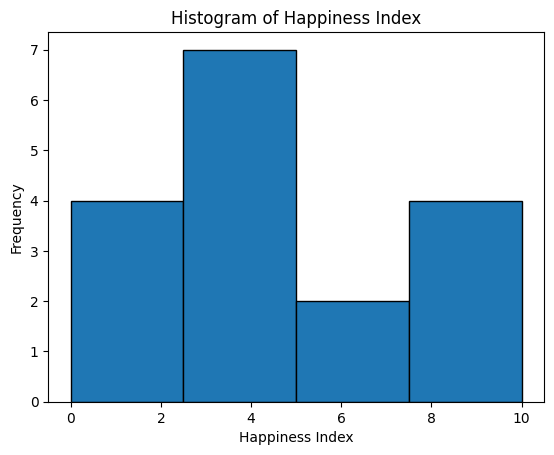

In [226]:
# Размер выборки
n = len(df_2021['Индекс счастья'])

# Вычисление количества интервалов по формуле Стёрджесса
k = int(1 + np.log2(n)) - 1

maxHappines = df_2021['Индекс счастья'].max() + 0.0005
minHappines = df_2021['Индекс счастья'].min() - 0.0005

# Размах выборки
rangeOfHappinessIndex= (maxHappines - minHappines)

# Вычисление ширины интервала
width = (rangeOfHappinessIndex / k)

# Создание списка границ интервалов
bin_edges = np.arange(start=minHappines,
                      stop=maxHappines+width,
                      step=width)


# Построение гистограммы
plt.hist(df_2021['Индекс счастья'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Happiness Index')
plt.xlabel('Happiness Index')
plt.ylabel('Frequency')
plt.show()


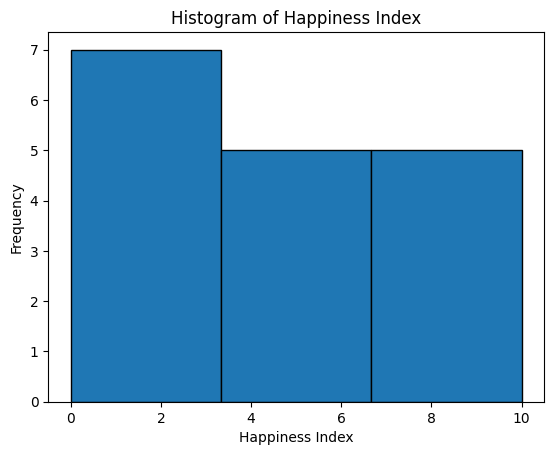

In [227]:
# Размер выборки
n = len(df_2021['Индекс счастья'])

# Вычисление количества интервалов по формуле Стёрджесса
k = int(1 + np.log2(n)) - 2

maxHappines = df_2021['Индекс счастья'].max() + 0.0005
minHappines = df_2021['Индекс счастья'].min() - 0.0005

# Размах выборки
rangeOfHappinessIndex= (maxHappines - minHappines)

# Вычисление ширины интервала
width = (rangeOfHappinessIndex / k)

# Создание списка границ интервалов
bin_edges = np.arange(start=minHappines,
                      stop=maxHappines+width,
                      step=width)


# Построение гистограммы
plt.hist(df_2021['Индекс счастья'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Happiness Index')
plt.xlabel('Happiness Index')
plt.ylabel('Frequency')
plt.show()
